# Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fractions import Fraction

For a full explanation behind what I am doing, please read the accompanying paper located here:
https://www.dropbox.com/sh/vxhhzhmzdu0crr0/AABCWe028Cie89miAmzOVv_za?dl=0

# Efficient Eco Frontier

Below I give graphs showing the efficient eco frontier for selected rounds:

## List of Eco Sends

To begin, we import a .csv file containing information about the cost and eco of the various sends of the game

In [2]:
filepath = r"EcoData.csv"
eco_data = pd.read_csv(filepath, converters={'Eco/6s': Fraction, 'Cost/6s': Fraction})

In [3]:
class BloonSend:
    def __init__(self, cost = 0, eco = 0, name = 'Zero Send'):
        self.cost = cost
        self.eco = eco
        self.name = name
    def is_dominated(self, other0, other1):
        a = (self.cost-other1.cost)/(other0.cost-other1.cost)
        if 0<=a<=1 and a*other0.eco+(1-a)*other1.eco>self.eco:
            return True
        return False
    def __repr__(self):
        return self.name

In [4]:
r1 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,2]]
r2 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,2,4]]
r3 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,4,6]]
r4 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,4,6,8]]
r5 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,6,8,10]]
r6 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,6,8,10,12]]
r7 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,8,10,12]]
r8 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,8,10,12,14]]
r9 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,9,10,12,14,16]]
r10 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,9,11,13,14,16,18]]
r11 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,9,11,13,15,17,18]]
r12 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,3,5,7,9,11,13,15,17,19,21]]
r13 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,5,7,9,11,13,15,17,19,22,23]]
r16 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,5,7,9,11,13,15,17,19,22,24]]
r23 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,9,13,15,17,20,22,24]]
r26 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,9,15,17,20,22,24]]
#r30 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,9,15,20,22,24]]
master = [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r16,r23,r26]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,16,23,26]

## Function Definitions

In [5]:
def eco_arrange(BloonSendList):
        return sorted(BloonSendList, key = lambda send: send.cost)

In [6]:
def efficient_frontier(BloonSendList):
    BloonSendList = eco_arrange(BloonSendList)
    # Given a list of eco sends, determine which pure sends belong to the efficient eco frontier
    
    eef = [0]
    
    # The list is assumed to be given in order of increasing cost and also contain the "zero send"
    # which is avaialable every round of the game
    
    i = 0
    while i < len(BloonSendList)-1:
        
        # Test remaining eco sends to determine which ones belong on the EEF
        slope = 0
        
        for j in range(i+1,len(BloonSendList)):
            test_val = (BloonSendList[j].eco - BloonSendList[i].eco)/(BloonSendList[j].cost - BloonSendList[i].cost)
            if test_val > slope:
                slope = test_val
                index = j
        
        # When the correct index is discovered, append it to EEF
        if index > i:
            eef.append(index)
            i = index
        else:
            # It's possible we may run out of eco sends to add to the frontier, in which case:
            break
        
    return eef

In [7]:
def eco_mix(intensity, BloonSendList):
    scale_factor = intensity - np.floor(intensity)
    index = int(np.floor(intensity)) + 1
    
    if index < len(BloonSendList):
        cost_val = scale_factor*BloonSendList[index].cost + (1 - scale_factor)*BloonSendList[index - 1].cost
        eco_val = scale_factor*BloonSendList[index].eco + (1 - scale_factor)*BloonSendList[index - 1].eco
    else:
        cost_val = BloonSendList[-1].cost
        eco_val = BloonSendList[-1].eco
    
    return BloonSend(cost_val, eco_val, f'This is a send')

## Graphs of the Efficient Eco Frontier

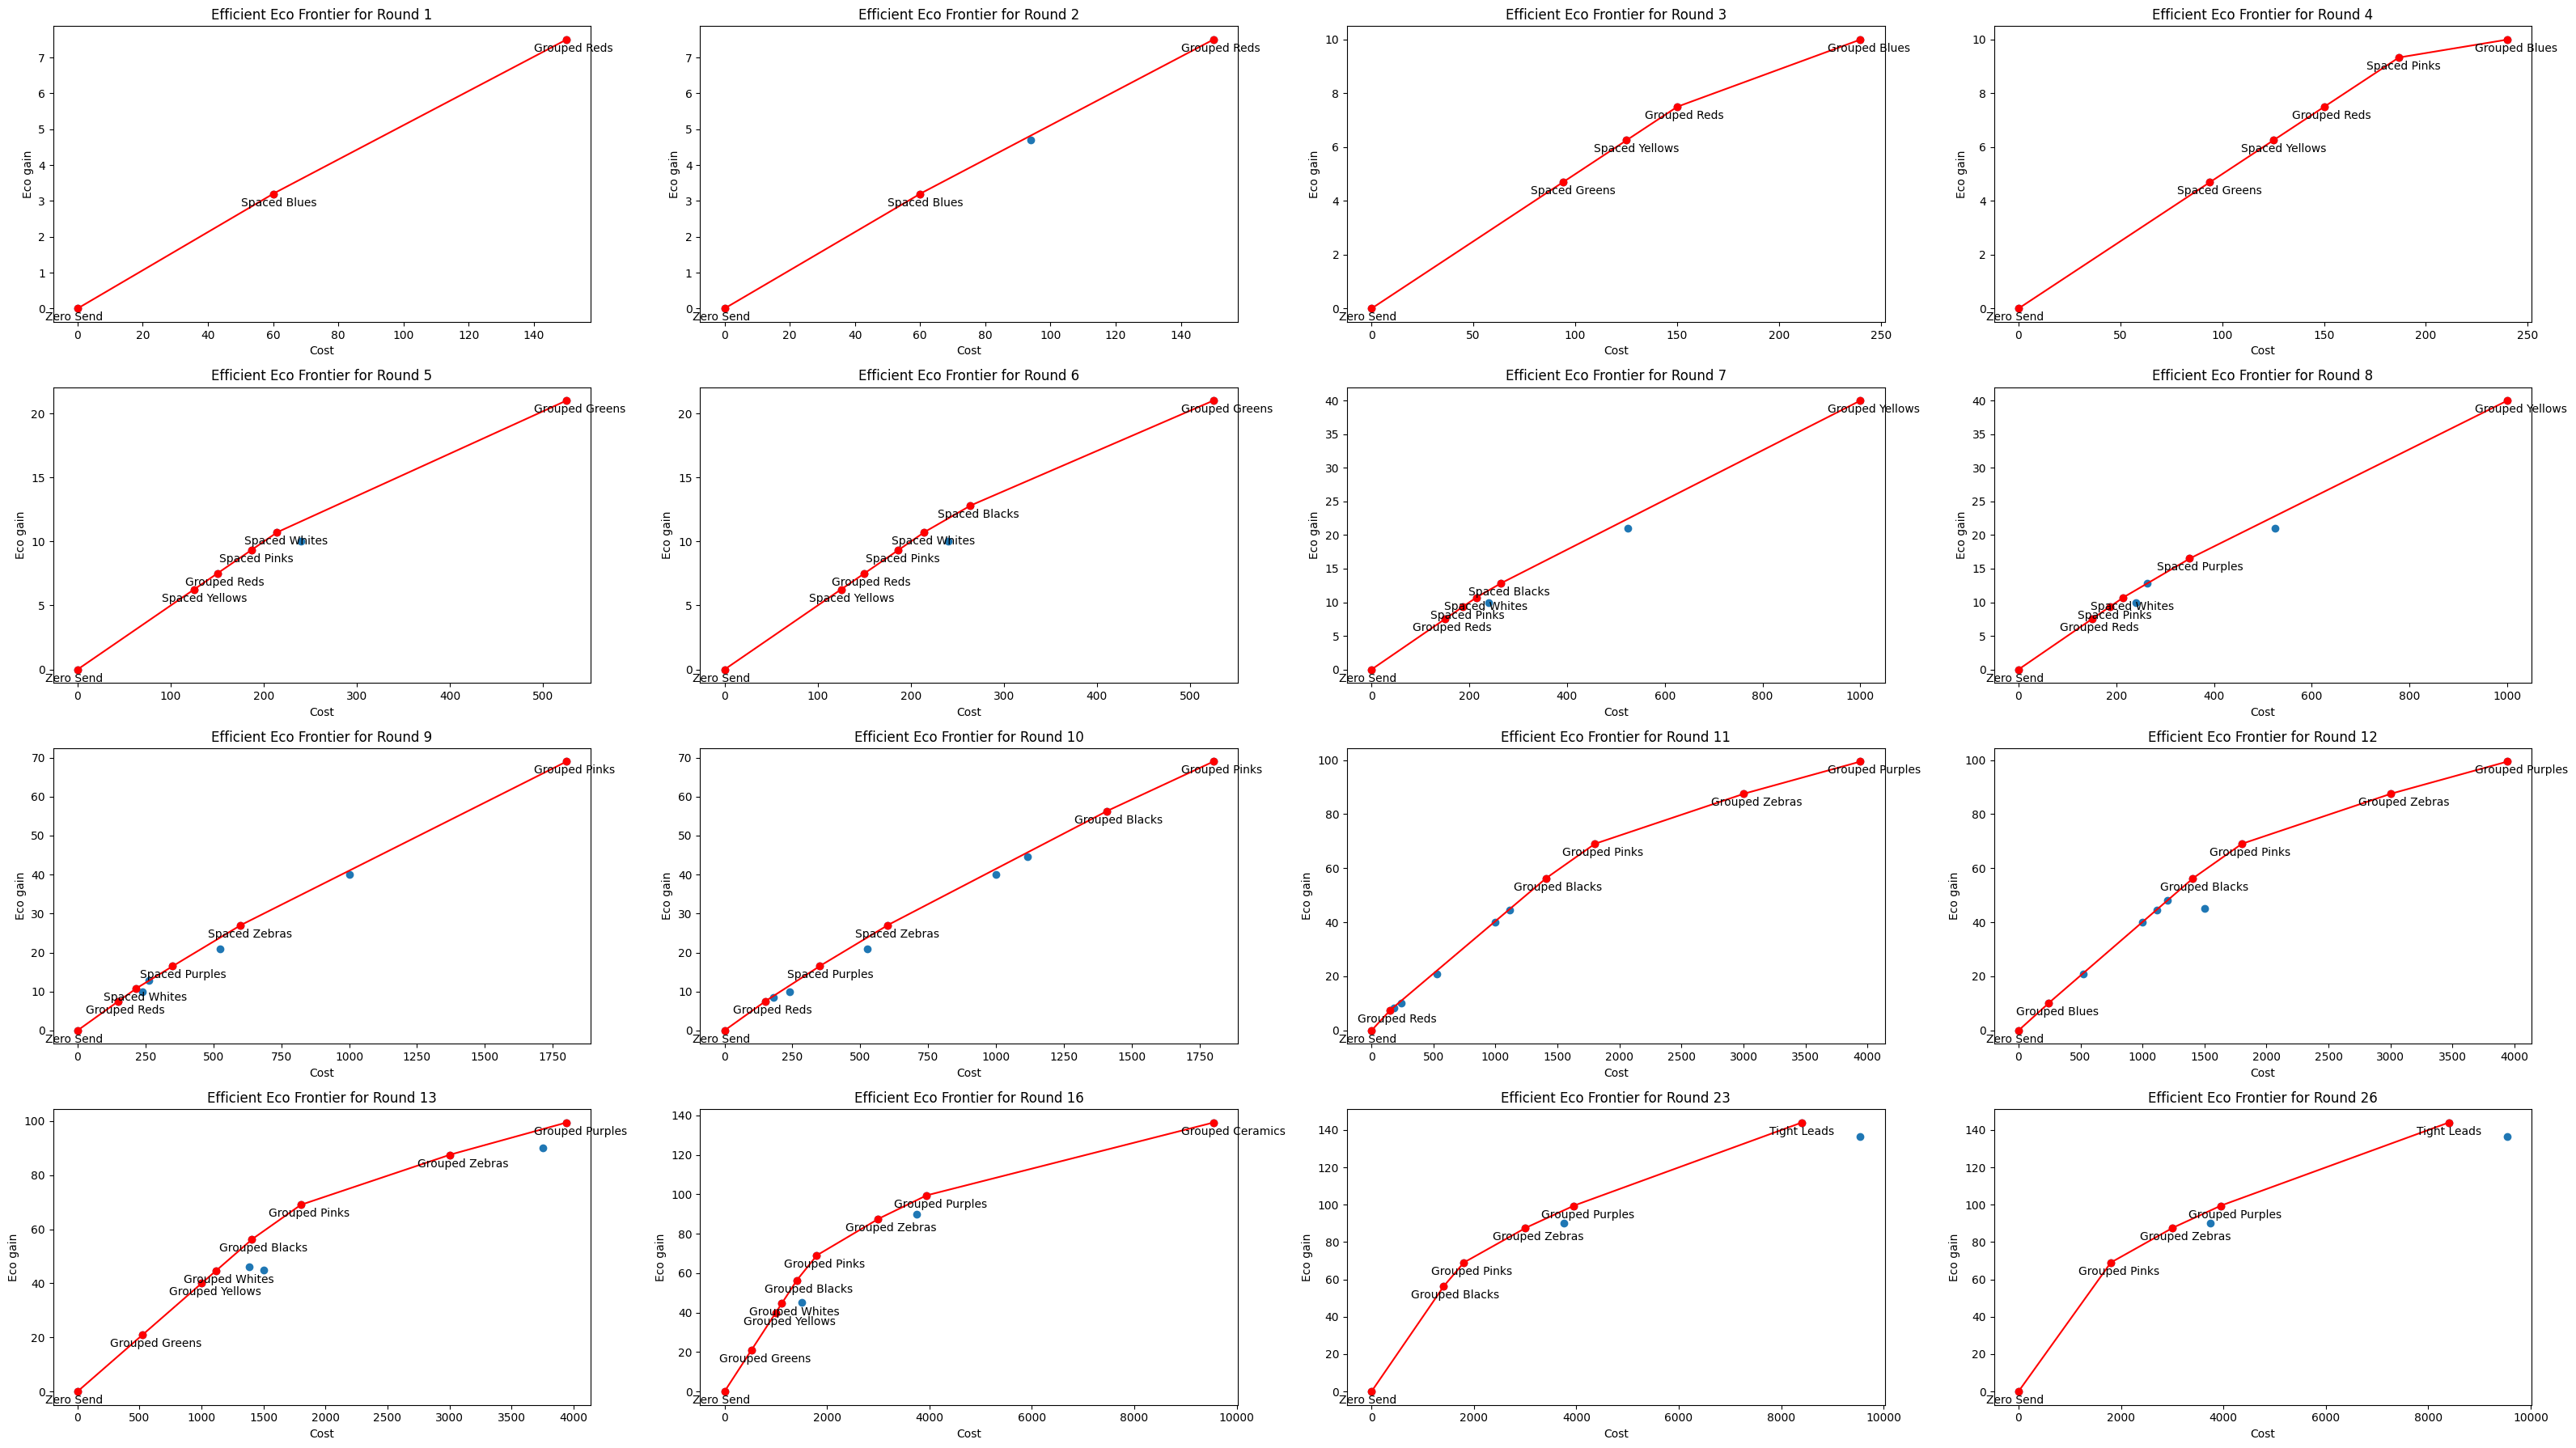

In [8]:
fig,ax = plt.subplots(int(np.ceil(len(master)/4)), 4)
N = 10000

for i in range(len(master)):
    q = int(np.mod(i,4))
    p = int(np.floor(i/4))

    BloonSendList = eco_arrange(master[i])

    S_cost_list = np.array([send.cost for send in BloonSendList])
    S_eco_list = np.array([send.eco for send in BloonSendList])
    S_names_list = np.array([send.name for send in BloonSendList])
    
    # Next, determine the sends that make up the efficient eco frontier
    eef = efficient_frontier(BloonSendList)
    
    # Finally, build the graph corresponding to the eco sends
    M = len(eef)

    # Build the values we will use to graph the EEF line
    x_val = []
    y_val = []
    for j in range(N):
        inp = (j/(N-1))*(M-1)
        x_out,y_out = (send := eco_mix(inp, [BloonSendList[i] for i in eef])).cost, send.eco
        x_val.append(x_out)
        y_val.append(y_out)

    # Plot all eco sends
    ax[p,q].scatter(S_cost_list,S_eco_list)
    
    # Plot the EEF with a different color
    ax[p,q].scatter(S_cost_list[eef],S_eco_list[eef], color = "red")

    annotations = S_names_list[eef]
    for j, label in enumerate(annotations):
        ax[p,q].annotate(label, (S_cost_list[eef][j], S_eco_list[eef][j]), xytext = (-40,-15), textcoords="offset pixels")

    ax[p,q].plot(x_val,y_val, color = "red")
    ax[p,q].set_ylabel("Eco gain")
    ax[p,q].set_xlabel("Cost")
    ax[p,q].set_title("Efficient Eco Frontier for Round " + str(labels[i]))

fig.set_size_inches(32,18)
fig.tight_layout()
fig.savefig("plot.png", dpi=120)